node :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

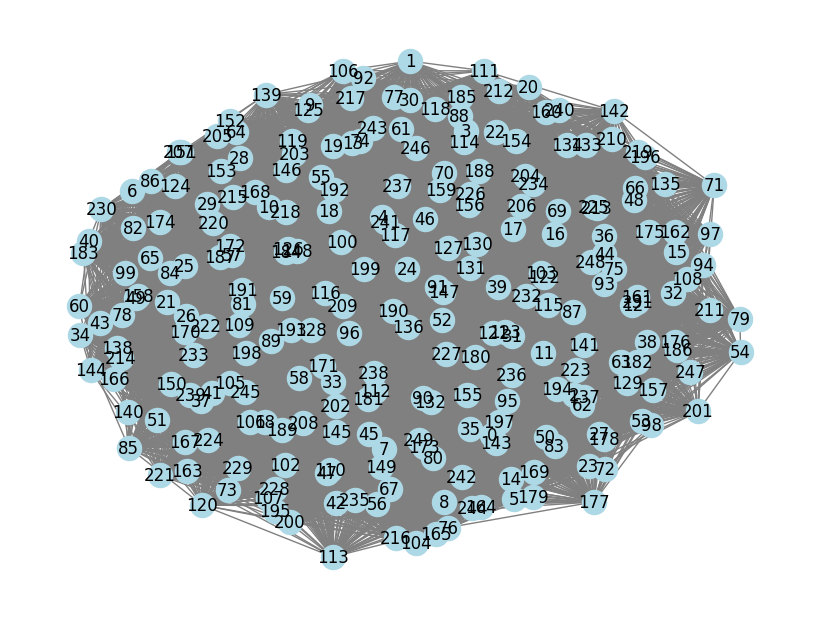

In [1]:
import networkx as nx
import random
import math
import matplotlib.pyplot as plt

# Küçük graf oluşturma fonksiyonu
def generate_graph(n=250, p=0.4, seed=42):
    random.seed(seed)
    G = nx.erdos_renyi_graph(n, p, seed=seed) #rastgele graf oluştur.

    # Graf bağlı mı kontrol et
    if not nx.is_connected(G): #Graf tek parça değilse çalışacak kod.
        components = list(nx.connected_components(G))
        for i in range(len(components)-1): #Parçaları birleştirmek için döngü.
            u = random.choice(list(components[i])) #i'inci component içinden rastgele bir düğüm seçiyor
            v = random.choice(list(components[i+1])) #i+1inci component içinden rastgele bir düğüm seçiyor
            G.add_edge(u, v) # Seçilen u ve v düğümlerini birbirine kenar ekleyerek bağlar.  Böylece graf tek parça (connected) hale gelir

    return G
G =generate_graph()
print("node : ",G.nodes())
print("edge:" , G.edges())

plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

In [2]:
def ozellikleri_ata(G):
    for node in G.nodes():
        G.nodes[node]['processing_delay']=round(random.uniform(0.5, 2.0), 2 ) #ms - sonraki 2 sayısı iki ondalik basamağa yuvarla demek
        G.nodes[node]['node_reliability']=round(random.uniform(0.95 ,0.999), 3 )

    for u, v in G.edges():
        G.edges[u, v]['bandwidth']=round(random.uniform(100 , 1000),1)
        G.edges[u, v]['link_delay']=round(random.uniform(3 , 15) , 1)
        G.edges[u, v][ 'link_reliability']=round(random.uniform(0.95 , 0.999),3)

    return G

G=ozellikleri_ata(G)

print("\n Düğümler ve özellikleri:")
for node in G.nodes(data=True): #grafın tüm düğümlerini ve her düğüme atanmış özelliklerini tek tek alır
    print(node)

print("\n Bağlantıalr ve özellikleri:")
for edge in G.edges(data=True):
    print(edge)

Streaming output truncated to the last 5000 lines.
(91, 179, {'bandwidth': 803.6, 'link_delay': 11.5, 'link_reliability': 0.996})
(91, 181, {'bandwidth': 412.3, 'link_delay': 3.4, 'link_reliability': 0.992})
(91, 183, {'bandwidth': 796.9, 'link_delay': 5.3, 'link_reliability': 0.997})
(91, 185, {'bandwidth': 949.3, 'link_delay': 14.1, 'link_reliability': 0.958})
(91, 186, {'bandwidth': 678.8, 'link_delay': 10.1, 'link_reliability': 0.995})
(91, 190, {'bandwidth': 106.9, 'link_delay': 14.2, 'link_reliability': 0.964})
(91, 193, {'bandwidth': 675.6, 'link_delay': 14.2, 'link_reliability': 0.968})
(91, 196, {'bandwidth': 540.4, 'link_delay': 14.8, 'link_reliability': 0.979})
(91, 199, {'bandwidth': 517.9, 'link_delay': 5.9, 'link_reliability': 0.956})
(91, 200, {'bandwidth': 586.4, 'link_delay': 13.2, 'link_reliability': 0.951})
(91, 202, {'bandwidth': 370.1, 'link_delay': 10.5, 'link_reliability': 0.995})
(91, 203, {'bandwidth': 741.1, 'link_delay': 7.0, 'link_reliability': 0.965})
(91, 

In [3]:
def total_delay(path,G):
    delay=0
    for i in range(len(path)-1):
        u=path[i]
        v=path[i+1]

        delay +=G.edges[u,v]['link_delay']

    for node in path[1:-1]:
        delay += G.nodes[node]['processing_delay']

    return delay


def reliability_cost(path, G):
    total_cost=0

# Bağlantı güvenilirlik maliyeti
    for i in range(len(path) - 1):
        u = path[i]
        v = path[i+1]
        r = G.edges[u, v]['link_reliability']
        total_cost += -math.log(r)

    for node in path:
        r=G.nodes[node]['node_reliability']
        total_cost += -math.log(r)
    return total_cost


def resource_cost(path,G):
    total_cost=0
    for i in range(len(path)-1):
        u = path[i]
        v= path[i+1]
        bw=G.edges[u,v]['bandwidth']
        total_cost += 1000 / bw
    return total_cost


def weighted_sum_method(path,G,w_delay=0.33,w_reliability=0.33, w_source=0.34): #önem sırasına göre oranları değiştirebilriz

    td=total_delay(path,G)
    rc=reliability_cost(path,G)
    rct=resource_cost(path,G)
    total=w_delay * td + w_reliability * rc+ w_source * rct
    return total




ornek_path = [0, 2]
print("Örnek path:", ornek_path)

try:
    print("Toplam gecikme:", total_delay(ornek_path, G))
    print("Güvenilirlik maaliyeti:", reliability_cost(ornek_path, G))
    print("Kaynak maaliyeti:", resource_cost(ornek_path, G))

    total_cost = weighted_sum_method(ornek_path, G,
                                            w_delay=0.33,
                                            w_reliability=0.33,
                                            w_source=0.34)


    print("Çok amaçlı toplam maliyet:", total_cost)
except Exception as e:
    print("Bir hata oluştu:", e)

Örnek path: [0, 2]
Toplam gecikme: 3.3
Güvenilirlik maaliyeti: 0.09887804236308816
Kaynak maaliyeti: 1.5151515151515151
Çok amaçlı toplam maliyet: 1.6367812691313341


In [4]:
# Hücre 4: Örnek bir S-D yolu bul ve metrikleri hesapla

# 1) Kaynak (S) ve hedef (D) düğümlerini seçelim
S = 0
D = 5

print("Seçilen kaynak (S):", S)
print("Seçilen hedef (D):", D)

# 2) Graf üzerinde S'den D'ye bir yol bulalım
try:
    # Kenar sayısına göre en kısa yol (saf topolojik)
    ornek_path = nx.shortest_path(G, source=S, target=D)
    print("Bulunan yol (path):", ornek_path)

    # 3) Metrikleri hesaplayalım
    td=total_delay(ornek_path, G)
    rc=reliability_cost(ornek_path, G)
    rct=resource_cost(ornek_path, G)
    wsm = weighted_sum_method(ornek_path, G,
                                   w_delay=0.33,
                                   w_reliability=0.33,
                                   w_source=0.34)

    print("\n--- Metrikler ---")
    print("Toplam gecikme:", td)
    print("Güvenilirlik maliyeti:", rc)
    print("Kaynak maliyeti:", rct)
    print("Çok amaçlı toplam maliyet:", wsm)

except nx.NetworkXNoPath:
    print(f"{S} ile {D} arasında yol yok, başka S ve D seçmeyi dene.")

Seçilen kaynak (S): 0
Seçilen hedef (D): 5
Bulunan yol (path): [0, 2, 5]

--- Metrikler ---
Toplam gecikme: 16.8
Güvenilirlik maliyeti: 0.13424618620087952
Kaynak maliyeti: 6.865606303808551
Çok amaçlı toplam maliyet: 7.922607384741198


In [5]:
# compute_edge_cost(G, u, v)
# ACO'nun bir sonraki kenarı seçebilmesi için tek bir kenarın
# yerel maliyetini hesaplar.
#
# Bu maliyet üç bileşenden oluşur:
#   - link_delay (gecikme)
#   - 1000 / bandwidth (kaynak maliyeti, düşük bant daha yüksek maliyet)
#   - -log(link_reliability) (güvenilirlik maliyeti)
#
# Bu fonksiyon sadece KENAR maliyetini hesaplar.
# Tüm yolun toplam maliyeti DEĞİLDİR.
# ACO'nun heuristic (sezgisel bilgi) hesabında kullanılır.

def compute_edge_cost(G, u, v):
    delay = G.edges[u,v]['link_delay']
    bw = G.edges[u,v]['bandwidth']
    rel = G.edges[u,v]['link_reliability']

    # küçük = daha iyi
    return delay + (1000/bw) - math.log(rel)


In [6]:
# Graf üzerindeki tüm kenarlar için başlangıç feromon değerini oluşturur.
# Amaç: Algoritmanın ilk iterasyonunda tüm kenarların eşit olmasını sağlamak.
# Her kenara küçük pozitif bir başlangıç değeri verilir (örneğin 0.1).
# Bu, karınca seçim olasılıklarının hesaplanabilmesi için gereklidir.

def initialize_pheromones(G, initial=0.1):
    pheromone = {}
    for u, v in G.edges():
        pheromone[(u,v)] = initial
        pheromone[(v,u)] = initial  # undirected
    return pheromone


In [7]:
# Karıncanın mevcut düğümdeyken hangi komşuya gideceğine karar verir.
# Seçim olasılığı şu formülle hesaplanır:
#   (pheromone[u][v]^alpha) * (heuristic[u][v]^beta)
# alpha = feromon etkisi, beta = sezgisel (maliyet metrikleri) bilginin etkisi.
# Ziyaret edilen düğümlere tekrar dönmemek için 'visited' listesi kontrol edilir.
# Bu fonksiyon ACO’nun çekirdeğidir: arama ve keşif burada gerçekleşir.

def choose_next_node(G, pheromone, current, visited, alpha=1.0, beta=2.0):
    neighbors = list(G.neighbors(current))
    candidates = []

    for v in neighbors:
        if v in visited:
            continue

        tau = pheromone[(current, v)]
        eta = 1 / compute_edge_cost(G, current, v)

        candidates.append((v, (tau**alpha) * (eta**beta)))

    if not candidates:
        return None

    nodes, weights = zip(*candidates)
    total_w = sum(weights)
    probs = [w / total_w for w in weights]

    next_node = random.choices(nodes, probs)[0]
    return next_node


In [8]:
# Bir karıncanın start → end arasında oluşturduğu tek bir yolu üretir.
# choose_next_node() fonksiyonunu tekrar tekrar çağırarak ilerler.
# 'path' listesi – karıncanın gerçek izlediği düğüm sırasıdır.
# 'visited' seti – döngü oluşmasını engellemek için kullanılan kontrol listesi.
# Eğer karınca sıkışırsa (ilerleyebileceği düğüm kalmazsa) None döner.

def build_path(G, pheromone, S, D, alpha=1.0, beta=2.0):
    current = S
    visited = set([S])
    path = [S]

    while current != D:
        next_node = choose_next_node(G, pheromone, current, visited, alpha, beta)

        if next_node is None:
            return None  # dead end

        visited.add(next_node)
        path.append(next_node)
        current = next_node

    return path


In [9]:
# evaluate_path(G, path, w_delay, w_reliability, w_resource)
# Bir karıncanın ürettiği yolun toplam maliyetini hesaplar.
# Maliyet, üç farklı metrigin ağırlıklı toplamıdır:
#   - total_delay(path)
#   - reliability_cost(path)
#   - resource_cost(path)
# Hesaplanan bu tek değer, yolun "kalitesini" belirler.
# ACO algoritması bu maliyeti minimum yapan yolu bulmaya çalışır.

def evaluate_path(path, G, w_delay, w_rel, w_res):
    td = total_delay(path, G)
    rc = reliability_cost(path, G)
    rs = resource_cost(path, G)

    total = w_delay*td + w_rel*rc + w_res*rs

    return total, td, rc, rs


In [10]:
# Tüm kenarlardaki feromonu (1 - rho) oranında azaltır.
# Amaç: kötü veya kullanılmayan yolların feromonunun zamanla silinmesi.
# Bu işlem eski bilginin etkisini azaltır ve algoritmayı taze tutar.
# Bu sayede karıncalar daha iyi yolları zamanla daha çok tercih eder.

def evaporate_pheromone(pheromone, rho=0.1):
    for edge in pheromone:
        pheromone[edge] *= (1 - rho)

# Bir karınca başarılı bir yol bulduğunda o yolun kenarlarına feromon ekler.
# Eklenen feromon miktarı: Q / cost
# cost düşükse (yani yol iyiyse) daha fazla feromon eklenir.
# Böylece kaliteli yollar zaman içinde daha çekici hale gelir.

def deposit_pheromone(pheromone, path, cost, Q=1.0):
    amount = Q / cost
    for i in range(len(path)-1):
        u = path[i]
        v = path[i+1]
        pheromone[(u,v)] += amount
        pheromone[(v,u)] += amount


In [11]:
# ACO algoritmasının ana döngüsünü çalıştırır.
# Her iterasyonda:
#   1) Bir grup karınca yol üretir.
#   2) Her yolun maliyeti hesaplanır.
#   3) En iyi yol güncellenir.
#   4) Feromon bu yollara göre güncellenir (buharlaşma + birikim).
# Sonuç olarak en düşük maliyetli yol döndürülür.
# Arayüz (UI) sadece bu fonksiyonu çağırmalı.

def ACO(G, S, D, w_delay, w_rel, w_res,
        n_ants=20, n_iter=15, alpha=1.0, beta=2.0, rho=0.1):

    pheromone = initialize_pheromones(G)
    best_path = None
    best_cost = float('inf')
    best_metrics = None

    for iteration in range(n_iter):
        print(f"\n--- Iteration {iteration+1}/{n_iter} ---")

        for ant in range(n_ants):
            path = build_path(G, pheromone, S, D, alpha, beta)
            if path is None:
                continue

            cost, td, rc, rs = evaluate_path(path, G, w_delay, w_rel, w_res)

            if cost < best_cost:
                best_cost = cost
                best_path = path
                best_metrics = (td, rc, rs)

            deposit_pheromone(pheromone, path, cost)

        evaporate_pheromone(pheromone, rho)

    return best_path, best_cost, best_metrics


In [15]:

# ACO algoritmasını başlatan ana çağrı.
# Bu bölümde:
#   - Kaynak (S) ve hedef (D) düğümleri belirlenir.
#   - ACO fonksiyonuna ağ, metrik ağırlıkları ve ACO parametreleri verilir.
#   - Fonksiyon en iyi yolu, toplam maliyeti ve metrik sonuçlarını döndürür.
# Son olarak, bulunan en iyi yol ve ilgili maliyet değerleri ekrana yazdırılır.

S = 0
D = 244

best_path, best_cost, (td, rc, rs) = ACO(
    G,
    S, D,
    w_delay=0.33,
    w_rel=0.33,
    w_res=0.34,
    n_ants=20,
    n_iter=15
)

print("\n=== FINAL BEST RESULT ===")
print("Best path:", best_path)
print("Best total cost:", best_cost)
print("Delay:", td)
print("Reliability cost:", rc)
print("Resource cost:", rs)



--- Iteration 1/15 ---

--- Iteration 2/15 ---

--- Iteration 3/15 ---

--- Iteration 4/15 ---

--- Iteration 5/15 ---

--- Iteration 6/15 ---

--- Iteration 7/15 ---

--- Iteration 8/15 ---

--- Iteration 9/15 ---

--- Iteration 10/15 ---

--- Iteration 11/15 ---

--- Iteration 12/15 ---

--- Iteration 13/15 ---

--- Iteration 14/15 ---

--- Iteration 15/15 ---

=== FINAL BEST RESULT ===
Best path: [0, 67, 244]
Best total cost: 3.9250757676411383
Delay: 9.430000000000001
Reliability cost: 0.17013308531968346
Resource cost: 2.2265642631930644
